In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix,precision_score,recall_score
import itertools

In [2]:
"""
信用卡欺诈分析：
数据集：2013年9月份两天时间内的信用卡交易数据
284807笔交易，492笔欺诈行为
https://www.kaggle.com/mlg-ulb/creditcardfraud
数据样本包括了28个特征V1，V2，……V28，以及交易时间Time和交易金额Amount
因为数据隐私，28个特征值是通过PCA变换得到的结果。
需要预测 每笔交易的分类Class，该笔交易是否为欺诈
Class=0为正常（非欺诈），Class=1代表欺诈
"""
# 数据加载
data = pd.read_csv('./creditcard.csv')
print(data.head())
print(data.shape)
print(data.columns)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

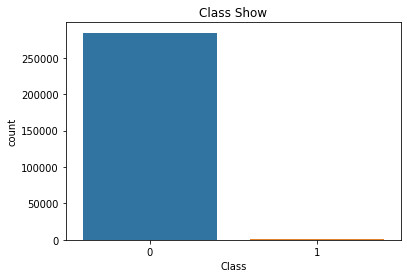

In [3]:
# 绘制Class分布
sns.countplot(x = 'Class',data = data)
plt.title('Class Show')
plt.show()

In [4]:
# 计算交易笔数，欺诈交易笔数
num = len(data)
fraud_num = len(data[data['Class'] == 1])
print('总交易笔数：',num)
print('欺诈交易笔数：',fraud_num)
print('欺诈交易比例：{:.4f}'.format(fraud_num/num))

总交易笔数： 284807
欺诈交易笔数： 492
欺诈交易比例：0.0017


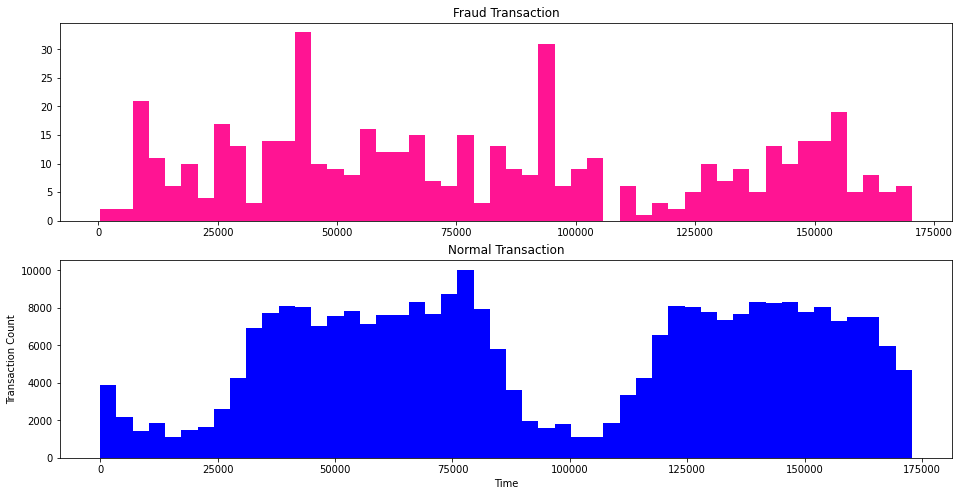

In [5]:
# 查看Class的时间分布
f,(ax1,ax2) = plt.subplots(2,1,figsize = (16,8))

plt.xlabel('Time')
plt.ylabel('Transaction Count')
#欺诈交易
ax1.hist(data.Time[data['Class'] == 1],bins = 50,color = 'deeppink')
ax1.set_title('Fraud Transaction')
#正常交易
ax2.hist(data.Time[data['Class'] == 0],bins = 50,color = 'blue')
ax2.set_title('Normal Transaction')

plt.show()

In [6]:
# 对Amount进行数据规范化
data['Amount_norm'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27       V28  Amount  C

In [7]:
#plot confusion matrix
def plot_confusion_matrix(cm,classes,normalize = False,title = 'Confusion Matrix',cmap = plt.cm.Blues):
    plt.figure()
    plt.imshow(cm,interpolation = 'nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 0)
    plt.yticks(tick_marks,classes)
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predict label')
    plt.show()   

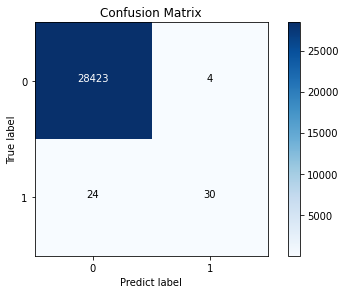

In [9]:
# 准备训练数据
y = np.array(data.Class.tolist())
X = data.drop(['Time','Amount','Class'],axis = 1)

# 切分数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

# 使用逻辑回归分类
clf = LogisticRegression()
clf.fit(X_train,y_train)
predict_y = clf.predict(X_test)

# 计算混淆矩阵
cm = confusion_matrix(y_test,predict_y)
classes = [0,1]

# 混淆矩阵可视化
plot_confusion_matrix(cm,classes)

In [15]:
# 计算评估分数
def show_metrics():
    tp,fp,tn,fn = cm[1,1],cm[0,1],cm[0,0],cm[1,0]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print('Precision:{:.3f}'.format(precision))
    print('Recall:{:.3f}'.format(recall))
    print('F1_score:{:.3f}'.format(2 * precision * recall/(precision + recall)))    

In [16]:
#计算评估指标
show_metrics()

Precision:0.882
Recall:0.556
F1_score:0.682


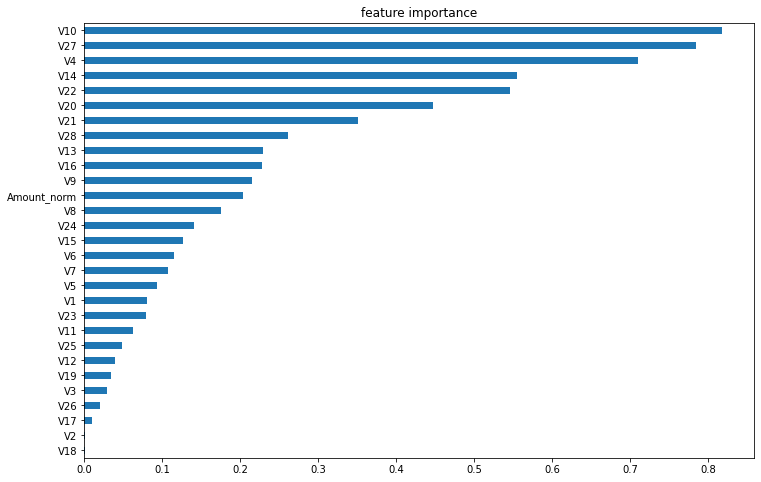

In [17]:
# 显示模型中特征重要性
coeffs = clf.coef_
df_co = pd.DataFrame(np.transpose(abs(coeffs)),columns = ['coef_'])
# 下标设置为feature_name
df_co.index = X.columns
df_co.sort_values('coef_',ascending = True,inplace = True)
plt.figure(figsize =(12,8))
df_co.coef_.plot(kind = 'barh')
plt.title('feature importance')
plt.show()